In [2]:
### Importing the basic library 
import pandas as pd 
import numpy as np

In [3]:
### Importing the dataset 
df= pd.read_csv(r"C:\Users\DELL\Downloads\abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
### As we have to predict age. So, first replace the ring column with age.
df['age']=df['Rings']+1.5 
df.drop(columns='Rings', inplace=True)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


### Now age column is the target.

In [6]:
### Check the null values 
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64

In [7]:
### Check the blank entry
df.loc[df["age"]== " "]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age


In [8]:
## Check the Datatype of the data set
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
age               float64
dtype: object

In [9]:
### As the sex is nominal data, now convert into the Catrgorical.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
sex = le.fit_transform(df['Sex'])
df["Sex"] = sex
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


### We checked the null values and data type of the dataset. Now moving toward EDA.


In [11]:
### importing the basic libraries for visualization 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

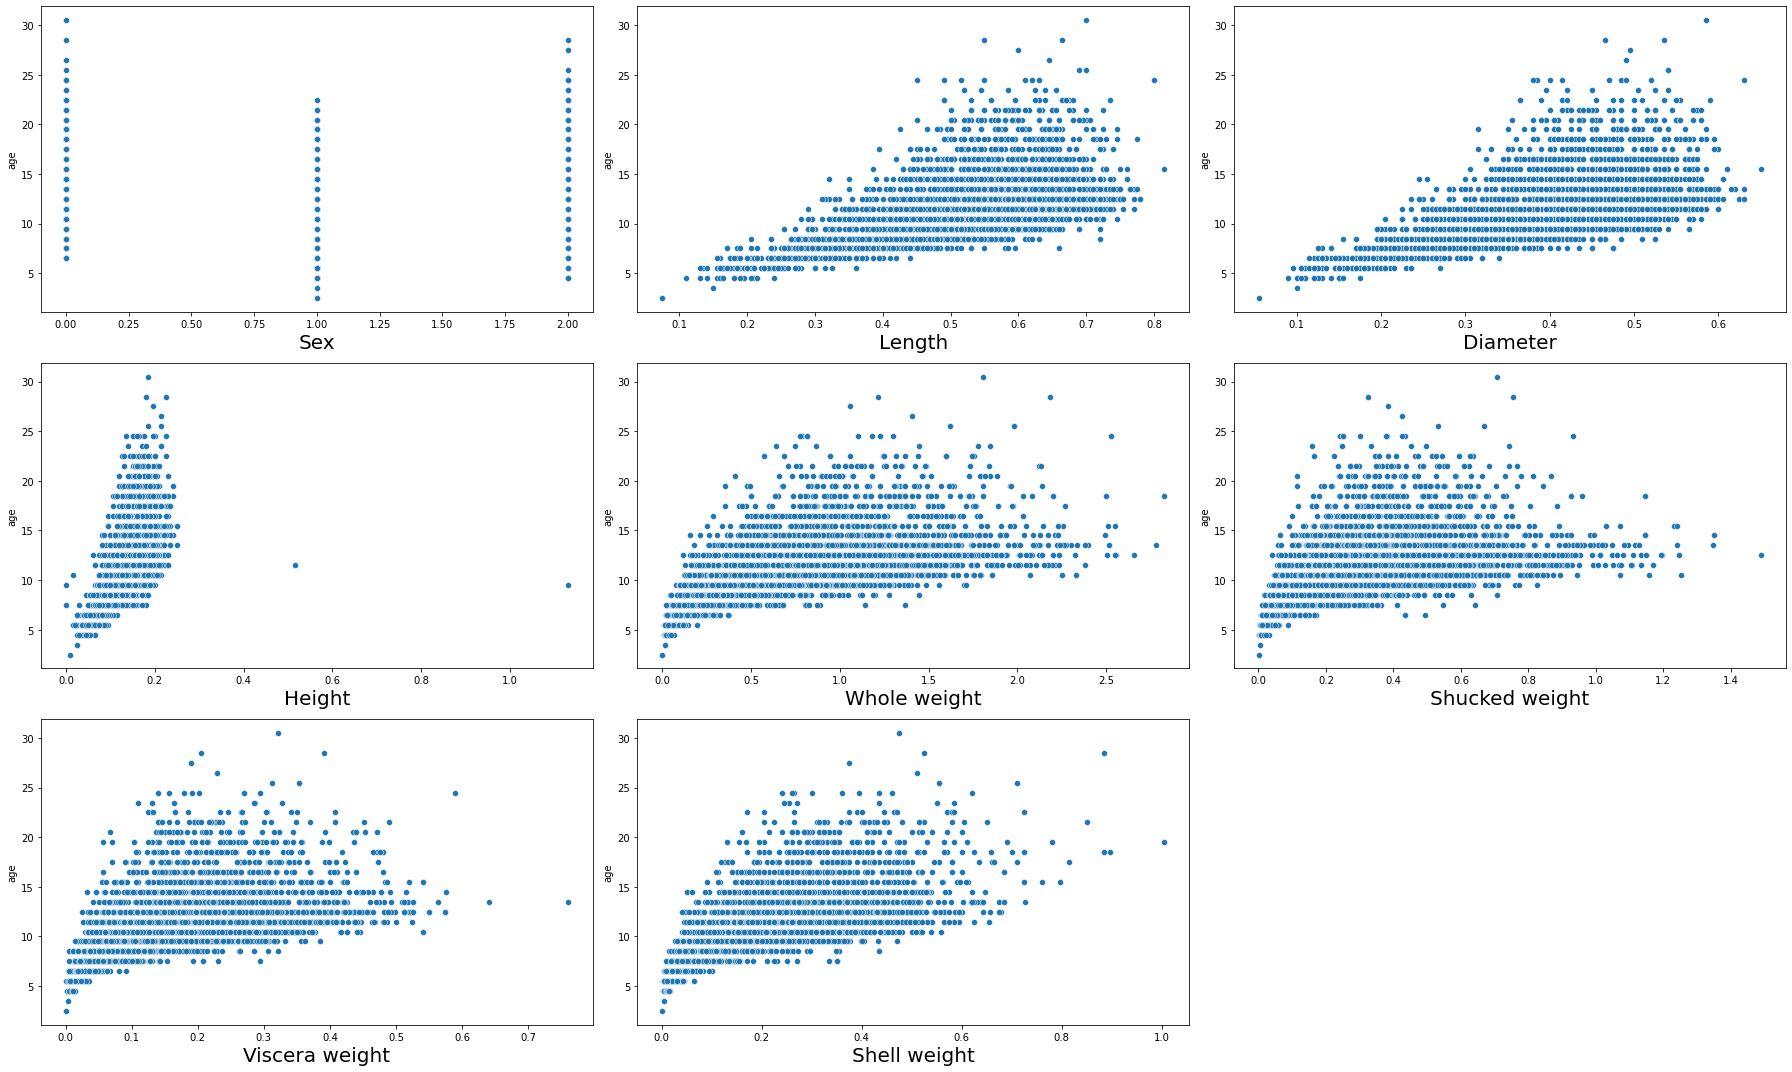

In [12]:
X= df.drop(columns="age")
Y=df["age"]
plt.figure(figsize=(25,15), facecolor="w")
pn=1
for column in X:
    if pn < 9:
        ax=plt.subplot(3,3,pn)
        sns.scatterplot(X[column],Y)
        plt.xlabel(column, fontsize= 20)
    pn+=1
plt.tight_layout()

### The above scatterplot show all features has good trend with the target.

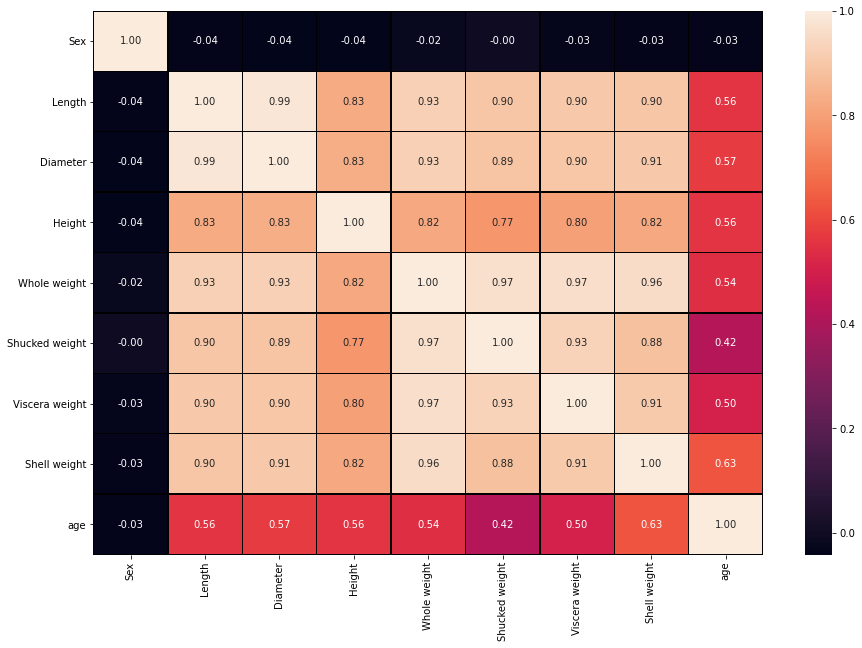

In [13]:
### Now going to check the multicollinearity through heatmap 
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, linecolor="black", fmt=".2f")
plt.show()

According the above heatmap graph all feature has  with eachother. Even some feature has more than 95% but I will not drop any feature.

Maximum relation of feature with target is  - Shell Weight(63%)
Minimum relation of feature with target is  - Shucked Weight(42%)


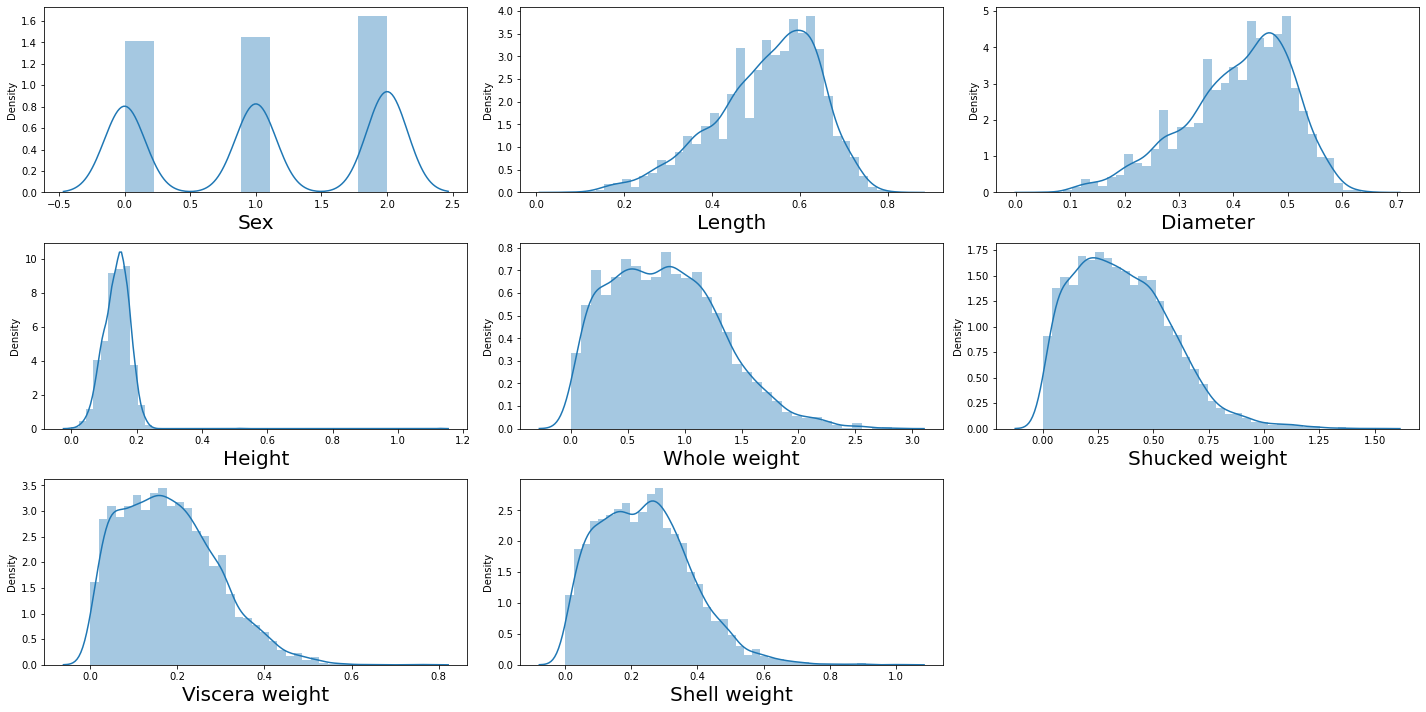

In [14]:
### Now checking the distribution of the data set.
plt.figure(figsize=(20,10), facecolor="w")
pn=1
for column in df:
    if pn < 9:
        ax=plt.subplot(3,3,pn)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize= 20)
    pn+=1
plt.tight_layout()

### Lenth and diameter are left skewed and other features are right skewed. I will work on that to remove skewness.

# Check Outliers

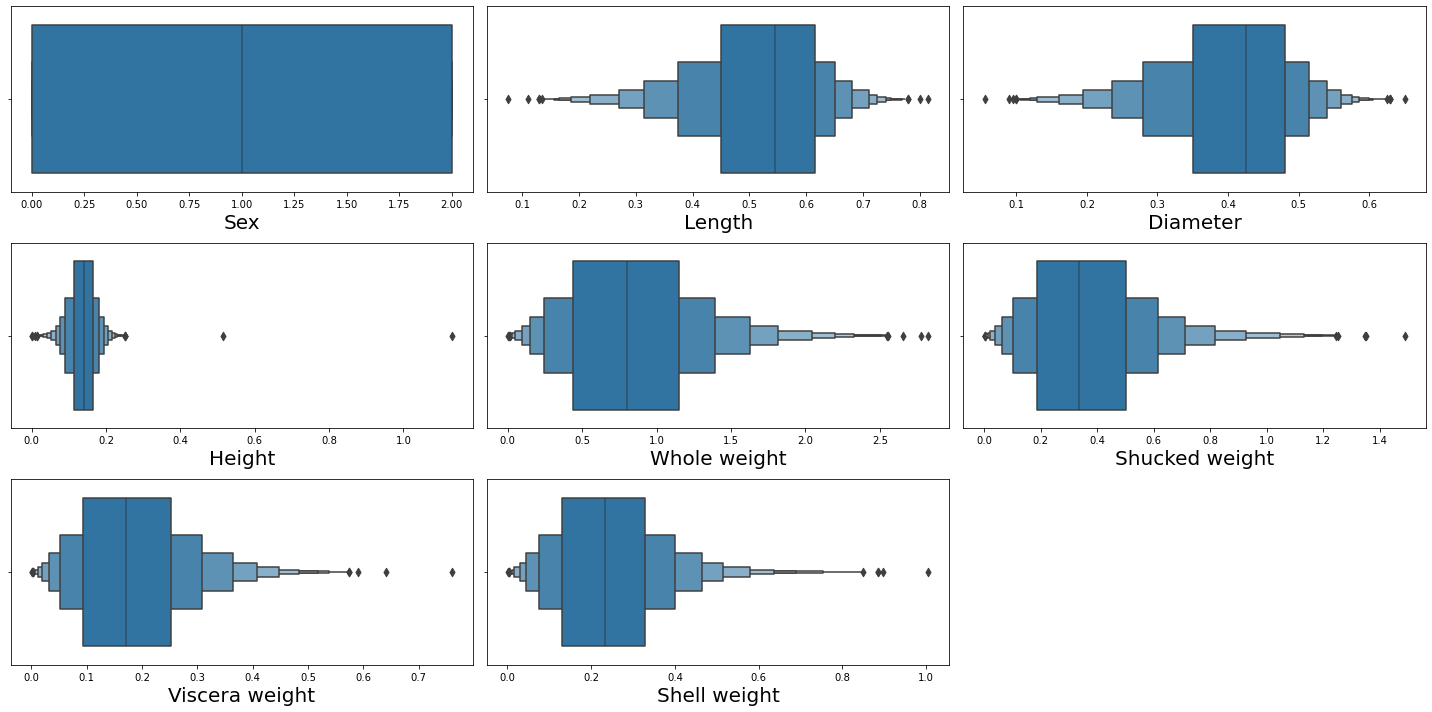

In [15]:
plt.figure(figsize=(20,10), facecolor="w")
pn=1
for column in df:
    if pn < 9:
        ax=plt.subplot(3,3,pn)
        sns.boxenplot(df[column])
        plt.xlabel(column, fontsize= 20)
    pn+=1
plt.tight_layout()

All features are has very less outliers. This will be workable but I will work on the outliers and remove the outliers with the help of z-score.

In [16]:
df.shape

(4177, 9)

In [17]:
## Importing the z-score and apply to the data set.
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold = 3
np.where(z<3)

(array([   0,    0,    0, ..., 4176, 4176, 4176], dtype=int64),
 array([0, 1, 2, ..., 6, 7, 8], dtype=int64))

In [18]:
df_new = df[(z<3).all(axis=1)]
df_new.shape

(4027, 9)

In [19]:
### Dataloss
data_loss= (4177-4027)/4177*100
print("Data loss of the dataset", data_loss)

Data loss of the dataset 3.5910940866650707


### The loss of the data is acceptable and I am moving forward

## Seperating the dataset into the feature and target and importing the basic model building libraries 

In [20]:
x= df_new.drop(columns="age")
y=df_new["age"]

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [22]:
### Scaling the data
sc= StandardScaler()
x_scale =sc.fit_transform(x)

In [82]:
### Spliting the data into the training and testing 
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=0.25, random_state=325)

In [83]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
score_train =knn.score(x_train,y_train)
score_test =knn.score(x_test,y_test)
print("Train Score",score_train, "\nTest Score", score_test)

Train Score 0.6626220094529884 
Test Score 0.4843365913756926


In [84]:
pred = knn.predict(x_test)
r2_score(y_test,pred)

0.4843365913756926

In [85]:
from sklearn.ensemble import RandomForestRegressor
rnd = RandomForestRegressor()
rnd.fit(x_train, y_train)
score_train =rnd.score(x_train,y_train)
score_test =rnd.score(x_test,y_test)
pred1 = rnd.predict(x_test)
r2= r2_score(y_test,pred1)
print("Train Score",score_train, "\nTest Score", score_test, "\nR2 Score is ", r2)

Train Score 0.9365053024136766 
Test Score 0.5118905230604922 
R2 Score is  0.5118905230604922


In [86]:
lr =LinearRegression()
lr.fit(x_train, y_train)
score_train =lr.score(x_train,y_train)
score_test =lr.score(x_test,y_test)
pred2 = lr.predict(x_test)
lr_r2= r2_score(y_test,pred2)
print("Train Score",score_train, "\nTest Score", score_test, "\nR2 Score is ", lr_r2)

Train Score 0.5214706136814657 
Test Score 0.4897860360352462 
R2 Score is  0.4897860360352462


In [87]:
MAE = mean_absolute_error(y_test,pred1)
MSE = mean_squared_error(y_test,pred1)
print("mean_absolute_error",MAE, "\nmean_squared_error", MSE)

mean_absolute_error 1.4914995034756704 
mean_squared_error 4.085142204568024


In [95]:
para = {'n_estimators':[7,8,9,10,12,15],
        'max_depth':[10,12,13,15],
    'min_samples_split':[7,9,10,11],
    'min_samples_leaf':[5,6,9,13]}
grid_search= GridSearchCV(estimator=rnd, param_grid=para)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 12, 13, 15],
                         'min_samples_leaf': [5, 6, 9, 13],
                         'min_samples_split': [7, 9, 10, 11],
                         'n_estimators': [7, 8, 9, 10, 12, 15]})

In [96]:
grid_search.best_params_

{'max_depth': 13,
 'min_samples_leaf': 9,
 'min_samples_split': 7,
 'n_estimators': 15}

In [115]:
rnd= RandomForestRegressor(max_depth= 13,
 min_samples_leaf=9,
 min_samples_split= 7,
 n_estimators=15)
rnd.fit(x_train,y_train)

RandomForestRegressor(max_depth=13, min_samples_leaf=9, min_samples_split=7,
                      n_estimators=15)

In [116]:
score_train =rnd.score(x_train,y_train)
score_test =rnd.score(x_test,y_test)
pred3 = rnd.predict(x_test)
r2= r2_score(y_test,pred3)
print("Train Score",score_train, "\nTest Score", score_test, "\nR2 Score is ", r2)

Train Score 0.7022937157256196 
Test Score 0.5348383254155281 
R2 Score is  0.5348383254155281


In [117]:
### Checking the m,odel accuracy by manully putying the values
print(rnd.predict([[2,0.45,0.36,0.09,0.51,0.22,0.10,0.15]])) 

[13.23163771]


In [118]:
MAE = mean_absolute_error(pred3,y_test)
MSE = mean_squared_error(pred3,y_test)
print("mean_absolute_error",MAE, "\nmean_squared_error", MSE)


mean_absolute_error 1.4436876615832703 
mean_squared_error 3.893084806931673


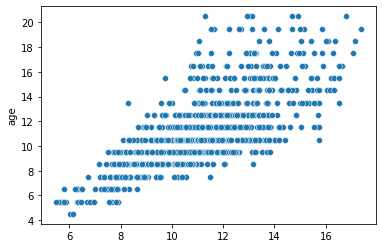

In [119]:
##plotting the scatterplot between predicated and original data
sns.scatterplot(x= pred3, y=y_test)
plt.show()

### We us three ML model Randomforest , LinearRegression and Descision Tree, as result R2 score is 53%. So, the conclusion, Model is performing good. 